# Modelo epidemiológico para la enfermedad infecciosa


## Suposiciones

1. La población inicial es de 1.000.000 habitantes sanos, en el día 0.
2. Una  persona puede estar en algunos de los siguientes estados:
    a. Sano
    b. Enfermo Leve
    c. Enfermo Grave
    d. Recuperado
    e. Fallecido
3. Asociado a los estados anteriores podemos obtener las siguientes probabilidades de transición:

    *${s_l}$ la probabilidad de pasar de estar sano a tener síntomas leves,
    
    *${l_g}$ la probabilidad de pasar de tener síntomas leves a tener síntomas graves, 
    
    *${l_r}$ la probabilidad de pasar de tener síntomas leves a recuperarse,   
    
    *${g_r}$ la probabilidad de pasar de tener síntomas graves a recuperarse,   
    
    *${g_f}$ la probabilidad de pasar de tener síntomas graves a fallecer.
    

    
    
                                    
                                    

Para cada día ${n}$, consideremos el vector:    ${X_{(n)}} = ({s_{(n)}},{l_{(n)}},{g_{(n)}},{r_{(n)}},{f_{(n)}})$
que corresponde a los individuos sanos, los enfermos leves, los enfermos graves, recuperados y fallecidos al día ${n}$

Por ejemplo al día ${0}$ todos los individuos están sanos,entonces ${X_{(0)}} = (1000000, 0, 0, 0, 0)$.
Para la evolución entre los distintos estados de Markov, se realizan las siguientes **suposiciones**:

1. Paso de un estado a otro:

     -Alguien solo puede fallecer si se encuentra enfermo grave.
     
     -Si alguien es enfermo grave, tiene ${g_f}$ probabilidad de pasar a fallecido, ${g_r}$ de recuperarse y, por lo tanto, $(1-{g_r}-{g_f})$
     
     -La enfermedad se contagia de persona a persona y, de una día a otro, una persona tiene ${s_l}$ probabilidad de pasar de estar sana a tener síntomas leves.
     
     -No se puede pasar directamente a tener síntomas graves, recuperarse o morir. De modo que se queda sana de un día a otro con probabilidad$(1 - {s_l})$
       
     -Si una persona tiene síntomas leves, tiene ${l_g}$ probabilidad de pasar a tener síntomas graves y ${l_r}$ de pasar a recuperarse. Por lo tanto, tiene probabilidad $(1-{l_g}-{l_r})$ de quedarse con síntomas leves.
     
     -Una persona que se recupera desarrolla inmunidad a la enfermedad, por lo que se queda en estado de recuperado.
     
     -Una persona que fallece, queda en ese estado.

Con estos número podemos entender cómo será el vector población:

${X_{(n-1)}} = ({s_{(n+1)}},{l_{(n+1)}},{g_{(n+1)}},{r_{(n+1)}},{f_{(n+1)}})$

si sabemos cómo es el vector 

${X_{(n)}} = ({s_{(n)}},{l_{(n)}},{g_{(n)}},{r_{(n)}},{f_{(n)}})$

Por ejemplo, podemos esperar que la cantidad de recuperados al día ${n+1}$ sea:

${r_{(n+1)}} = l_{r}.l_{(n)}+ g_{r}.g_{(n)}+1.r_{(n)}$


pues de los síntomas leves del día ${n}$ habrá una proporción ${l_r}$ de ellos que se recuperen, de los graves del día $n$ habrá una proporción ${g_{r}}$ que se recuperen y todos los recuperados del día $n$ quedan recuperados. De esta forma, obtenemos el siguiente sistema de ecuaciones:

${s_{(n+1)}} = (1 - s_{l}).s_{(n)}$

${l_{(n+1)}} = s_{l}.s_{(n)}+(1 - l_{r} - l_{g}).l_{(n)}$

${g_{(n+1)}} = l_{g}.l_{(n)}+(1 - g_{r} - g_{f}).g_{(n)}$

${r_{(n+1)}} = l_{r}.l_{(n)}+ g_{r}.g_{(n)}+1.r_{(n)}$

${f_{(n+1)}} = g_{f}.g_{(n)}+ 1.f_{(n)}$

Este sistema de ecuación se puede escribir de una forma mucho más compacta:
    
$
A_{5 \times 5}=
\begin{pmatrix}
1 - s_{l} & 0 & 0 & 0 & 0\\
s_{l} & 1 - l_{r} - l_{g} & 0 & 0 & 0\\
0 & l_{g} & 1 - g_{r} - g_{f} & 0 & 0\\
0 & l_{r} & g_{r} & 1 & 0\\
0 & 0 & g_{f} & 0 & 1\\
\end{pmatrix}
$

las ecuaciones anteriores de pueden abreviar a:
    
${X_{(n + 1)}} = {A}.{X_{(n)}}$

De esta forma, se queremos entender qué esperar del día $n$, basta hacer la multiplicación matricial:

${X_{(n)}} = {A^{n}}.{X_{(0)}}$

## Cadena de Markov

Se tiene los siguiente valores para los parámetros del modelo: 
${s_l} = 0.20$, ${l_g} = 0.5$, ${l_r} = 0.25$, ${g_r} = 0.15$ y ${g_f} = 0.15$ 

**Genera un algoritmo que retorne el estado de la población al día 20. Grafique.** 

In [2]:
import numpy as np
import matplotlib.pyplot as plt

sl = 0.2
lg = 0.15
lr = 0.25
gr = 0.15
gf = 0.15

#Vector población
x = np.array([[1000000],[0],[0],[0],[0]])

#Matriz de probabilidades
A = np.array([[1-sl, 0,0,0,0],[sl,1-lr-lg,0,0,0],[0,lg,1-gr-gf,0,0],[0,lr,gr,1,0],[0,0,gf,0,1]])

In [5]:
x

array([[1000000],
       [      0],
       [      0],
       [      0],
       [      0]])

In [6]:
A

array([[0.8 , 0.  , 0.  , 0.  , 0.  ],
       [0.2 , 0.6 , 0.  , 0.  , 0.  ],
       [0.  , 0.15, 0.7 , 0.  , 0.  ],
       [0.  , 0.25, 0.15, 1.  , 0.  ],
       [0.  , 0.  , 0.15, 0.  , 1.  ]])

In [11]:
def vector_poblacion(dias):
    sl = 0.2
    lg = 0.15
    lr = 0.25
    gr = 0.15
    gf = 0.15

    #Vector población
    x = np.array([[1000000],[0],[0],[0],[0]])

    #Matriz de probabilidades
    A = np.array([[1-sl, 0,0,0,0],[sl,1-lr-lg,0,0,0],[0,lg,1-gr-gf,0,0],[0,lr,gr,1,0],[0,0,gf,0,1]])
    
    sanos = [1000000]
    leves = [0]
    graves = [0]
    recuperados = [0]
    fallecidos = [0]
    
    #Obtengo Poblaciones por día transcurrido
    for i in range(1, dias + 1): #sumo 1 a días porque range no tiene en cuenta el último número
        x = np.dot(A, x)
        poblacion = [int(elem) for elem in x]
        sanos.append(poblacion[0])
        leves.append(poblacion[1])        
        graves.append(poblacion[2])        
        recuperados.append(poblacion[3])        
        fallecidos.append(poblacion[4])        
    
    #Gráfico
    plt.figure()
    plt.plot(sanos, c='green')
    plt.plot(leves, c='orange')
    plt.plot(graves, c='red')
    plt.plot(recuperados, c='blue')
    plt.plot(fallecidos, c='grey')
    plt.legend(['sanos','leves','graves','recuperados','fallecidos'])
    plt.xlabel('Días')
    plt.ylabel('Población(n personas)')
    plt.title(f'N = {dias}')
    
    return [int(elem) for elem in x]

[167772, 150976, 103908, 501562, 75780]

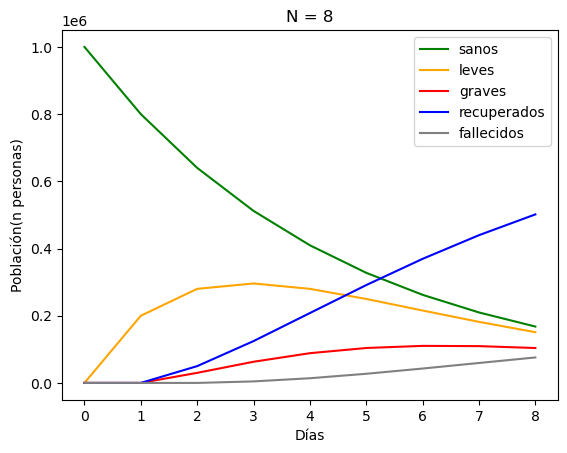

In [12]:
vector_poblacion(8)